In [1]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import joblib

In [2]:
# Đọc file Excel
data = pd.read_csv('Data/Exasens.csv')

# Tách dữ liệu đầu vào (features) và nhãn (labels)
X = data.drop('Diagnosis', axis=1)
X = np.array(X)

# Dữ liệu training chưa khử NaN bỏ id và nhãn
data_init = X[2:, 1:8]
n = data_init.shape[0]
m = data_init.shape[1]
df = pd.DataFrame(data_init)

In [3]:
# Tạo một đối tượng SimpleImputer với chiến lược điền giá trị trung bình
#most_frequent median
imputer = SimpleImputer(strategy='mean')

# Điền giá trị trung bình vào các giá trị khuyết trong DataFrame
df_filled = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

df_t = np.array(df_filled)

In [4]:
# Chuyển kiểu dữ liệu thành float để nhận data cuối cùng
df_file = pd.DataFrame(df_t)
df_file.to_csv('Data/DataFinal.csv', index=False)
data_finally = df_t.astype(float)

# Label encoding nhãn, split 2 dòng đầu không có giá trị
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Diagnosis'])[2:]

In [5]:
# Chia dữ liệu thành bộ train và bộ test (test_size là phần trăm của bộ test)
X_train, X_test, y_train, y_test = train_test_split(data_finally, y, test_size=0.1, shuffle=True, random_state=1409)

c = int(input('Nhap tham so C cua mo hinh, C = '))

kfold = KFold(n_splits=10, shuffle=True, random_state=96)
acc, pre, f1, rec = [], [], [], []
label_pred = []

svm_model = SVC(kernel='linear', C=1000)
svm_model.fit(X_train, y_train)
yh_pred = svm_model.predict(X_test)
joblib.dump(svm_model, 'Data/models/svm_model_1.joblib')
h_accuracy = accuracy_score(y_test, yh_pred)
print("Độ chính xác trên bộ test:", h_accuracy)
a = []

for i in X_test:
    predicted_label = svm_model.predict([i])
    decoded_label = label_encoder.inverse_transform(predicted_label)
    print("Nhãn dự đoán:", decoded_label)
    a.append(decoded_label)

Độ chính xác trên bộ test: 0.6
Nhãn dự đoán: ['HC']
Nhãn dự đoán: ['HC']
Nhãn dự đoán: ['HC']
Nhãn dự đoán: ['HC']
Nhãn dự đoán: ['COPD']
Nhãn dự đoán: ['HC']
Nhãn dự đoán: ['COPD']
Nhãn dự đoán: ['HC']
Nhãn dự đoán: ['HC']
Nhãn dự đoán: ['COPD']
Nhãn dự đoán: ['COPD']
Nhãn dự đoán: ['HC']
Nhãn dự đoán: ['HC']
Nhãn dự đoán: ['HC']
Nhãn dự đoán: ['HC']
Nhãn dự đoán: ['COPD']
Nhãn dự đoán: ['HC']
Nhãn dự đoán: ['COPD']
Nhãn dự đoán: ['HC']
Nhãn dự đoán: ['HC']
Nhãn dự đoán: ['COPD']
Nhãn dự đoán: ['COPD']
Nhãn dự đoán: ['HC']
Nhãn dự đoán: ['COPD']
Nhãn dự đoán: ['HC']
Nhãn dự đoán: ['COPD']
Nhãn dự đoán: ['HC']
Nhãn dự đoán: ['COPD']
Nhãn dự đoán: ['HC']
Nhãn dự đoán: ['COPD']
Nhãn dự đoán: ['COPD']
Nhãn dự đoán: ['Asthma']
Nhãn dự đoán: ['HC']
Nhãn dự đoán: ['HC']
Nhãn dự đoán: ['HC']
Nhãn dự đoán: ['COPD']
Nhãn dự đoán: ['HC']
Nhãn dự đoán: ['COPD']
Nhãn dự đoán: ['COPD']
Nhãn dự đoán: ['HC']


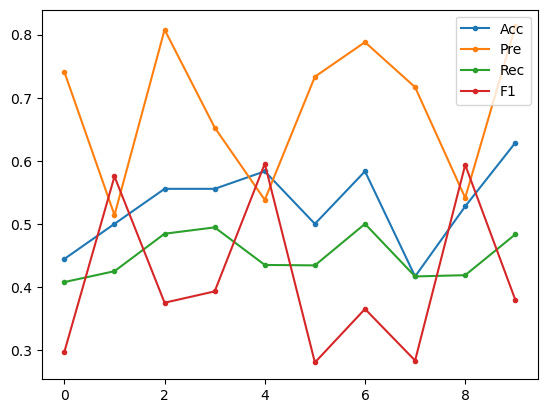

Accuracy:
  [0.4444444444444444, 0.5, 0.5555555555555556, 0.5555555555555556, 0.5833333333333334, 0.5, 0.5833333333333334, 0.4166666666666667, 0.5277777777777778, 0.6285714285714286]
Precision:
 [0.7407407407407407, 0.5138888888888888, 0.8078817733990148, 0.6526679841897233, 0.5380434782608696, 0.7333333333333333, 0.7880952380952381, 0.7166666666666666, 0.5413461538461539, 0.8129370629370629]
Recall:
 [0.40773809523809523, 0.42500000000000004, 0.484375, 0.49444444444444446, 0.43487394957983194, 0.4342105263157895, 0.5, 0.41666666666666663, 0.4186507936507936, 0.48333333333333334]
F1:
 [0.2972756410256411, 0.5752032520325203, 0.375, 0.3929777652687869, 0.5953947368421053, 0.2802631578947368, 0.3650895140664962, 0.2833333333333333, 0.5935828877005348, 0.3796653796653797]


In [6]:
for i, (train_idx, val_idx) in enumerate(kfold.split(X_train, y_train)):
    a = []
    svm = SVC(kernel="linear", C=c)
    svm.fit(X_train[train_idx], y_train[train_idx])
    y_pred = svm.predict(X_train[val_idx])

    for j in X_train[val_idx]:
        predicted_label = svm.predict([j])
        decoded_label = label_encoder.inverse_transform(predicted_label)
        # print("Nhãn dự đoán:", decoded_label)
        a.append(decoded_label)
    label_pred.append(a)
    p, r, f, s = precision_recall_fscore_support(y_true=y_train[val_idx], y_pred=y_pred, zero_division=1, average='macro')
    acc.append(accuracy_score(y_train[val_idx], y_pred))
    pre.append(p)
    rec.append(r)
    f1.append(f)

plt.show()
plt.plot(acc, marker='.')
plt.plot(pre, marker='.')
plt.plot(rec, marker='.')
plt.plot(f1, marker='.')
plt.legend(['Acc', 'Pre', 'Rec', 'F1'])
plt.show()
d = pd.DataFrame(label_pred)
d.to_csv('Final/Predicted.csv', index=True)
print('Accuracy:\n ', acc)
print('Precision:\n', pre)
print('Recall:\n', rec)
print('F1:\n', f1)